#🌟 Customer Churn Analysis & Insights for a Telecom Company

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

In [252]:
dataset = pd.read_csv(r'/content/ti_le_roi_bo( vien thong).csv')
dataset.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


# fixing data

In [253]:
dataset.shape

(7043, 21)

In [254]:
# deleting custumer id
dataset = dataset.drop(dataset[["customerID"]], axis= 1)

In [255]:
# duplicated
dataset.duplicated().sum()

np.int64(22)

In [256]:
dataset.drop_duplicates(inplace=True)

In [257]:
dataset.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,float64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [258]:
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors= 'coerce')

In [259]:
dataset.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,7
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,55
OnlineBackup,0


In [260]:
#tach data
target = 'Churn'
x = dataset.iloc[:,:-1]
y = dataset[target]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2, random_state= 42)
missing= []

#dien missing values cho bo train va bo test
for col in x_train.columns:
    if dataset[col].isnull().sum() != 0:
        missing.append(col)

for col in missing:
    if col == 'tenure' or col == 'TotalCharges':
        x_train[col].fillna(round(x_train[col].median(),0), inplace= True)
        x_test[col].fillna(round(x_test[col].median(),0), inplace= True)
    else:
        x_train[col].fillna(x_train[col].mode()[0], inplace = True)
        x_test[col].fillna(x_test[col].mode()[0], inplace = True)

/tmp/ipython-input-260-1893894342.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train[col].fillna(round(x_train[col].median(),0), inplace= True)
/tmp/ipython-input-260-1893894342.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

# Statictis data

In [261]:
x_train.nunique()

,0
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3
OnlineBackup,3


In [262]:
for col in x_train.columns:
    print(f'{col}:',x_train[col].unique(), '\n')

gender: ['Female' 'Male'] 

SeniorCitizen: [0 1] 

Partner: ['No' 'Yes'] 

Dependents: ['No' 'Yes'] 

tenure: [ 4. 33.  9. 29. 35. 28. 18. 42. 63. 62. 57. 48.  2. 72. 20. 71.  5. 39.
 31. 68.  1. 22. 13.  8. 15. 17. 19. 25.  7. 47. 41. 43. 30. 16. 46. 52.
 21. 51. 55. 60. 40. 49. 11. 66. 36. 67.  3. 12. 10. 69. 27. 23. 50. 58.
 54. 37. 34. 14. 53. 24. 61. 32. 64. 56. 45. 26.  6. 38. 59. 70. 65. 44.
  0.] 

PhoneService: ['Yes' 'No'] 

MultipleLines: ['No' 'Yes' 'No phone service'] 

InternetService: ['Fiber optic' 'No' 'DSL'] 

OnlineSecurity: ['No' 'No internet service' 'Yes'] 

OnlineBackup: ['No' 'Yes' 'No internet service'] 

DeviceProtection: ['No' 'Yes' 'No internet service'] 

TechSupport: ['No' 'No internet service' 'Yes'] 

StreamingTV: ['No' 'No internet service' 'Yes'] 

StreamingMovies: ['Yes' 'No' 'No internet service'] 

Contract: ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling: ['Yes' 'No'] 

PaymentMethod: ['Electronic check' 'Credit card (automatic)' 'Maile

In [263]:
x_train.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5616.000000,5616.000000,5616.000000,5616.000000
mean,0.164530,32.358084,64.827030,2285.694774
std,0.370789,24.395826,30.165926,2263.061084
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,407.950000
50%,0.000000,29.000000,70.300000,1403.000000
75%,0.000000,55.000000,90.100000,3782.800000
max,1.000000,72.000000,118.750000,8684.800000


In [264]:
x_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3276,Female,0,No,No,4.0,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,79.15,317.25
6266,Male,1,No,No,33.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),83.85,2716.30
1324,Female,0,Yes,Yes,4.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.35,76.35
5201,Male,0,No,No,9.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check,19.90,164.60
4080,Female,0,Yes,Yes,29.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,26.10,692.55


# EXPLORE DATA

Text(0.5, 1.0, 'Dependents')

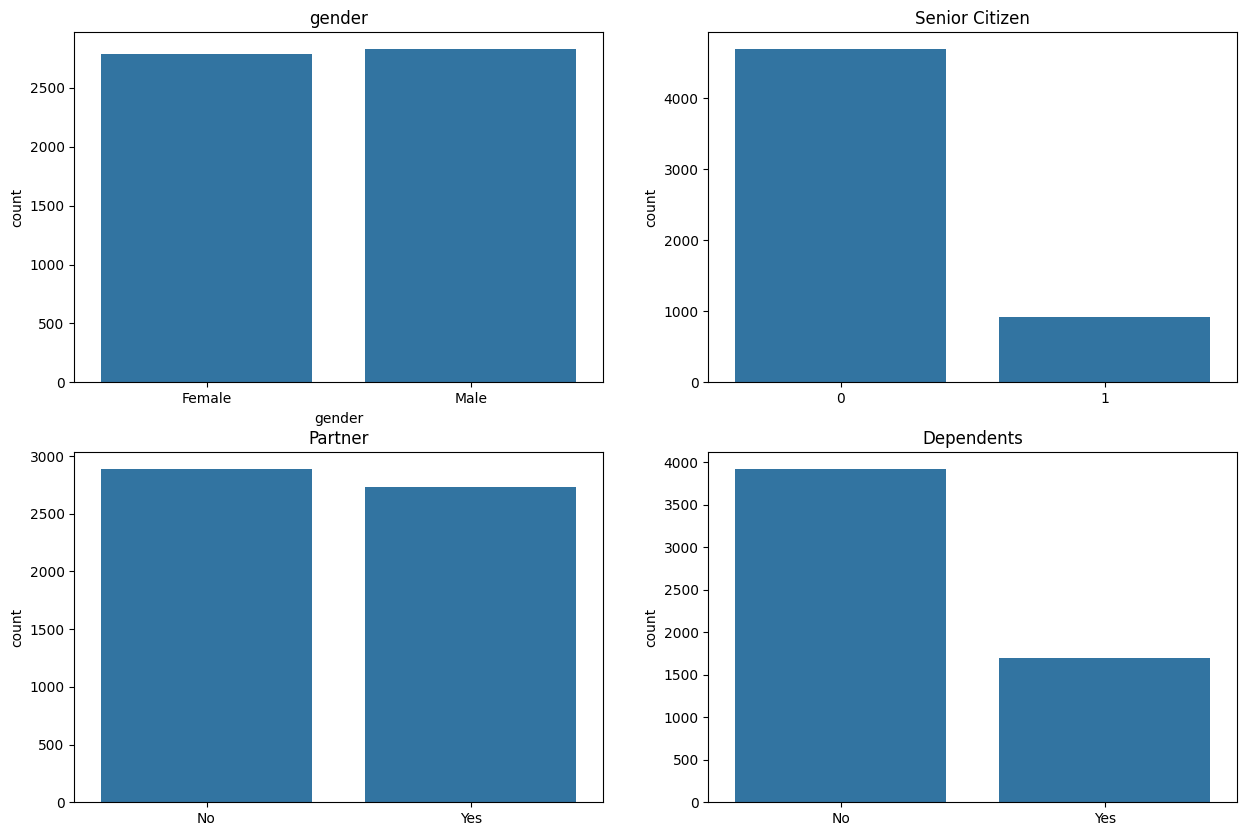

In [265]:
fig, ax = plt.subplots(2,2, figsize =(15,10))

sns.countplot(x= x_train['gender'], ax = ax[0,0]).set_title('gender')
sns.barplot(y = x_train['SeniorCitizen'].value_counts(), x = x_train['SeniorCitizen'].unique(), ax=ax[0,1]).set_title('Senior Citizen')

sns.barplot(y= x_train['Partner'].value_counts(), x = x_train['Partner'].unique(), ax=ax[1,0]).set_title('Partner')

sns.barplot(y=x_train['Dependents'].value_counts(), x = x_train['Dependents'].unique(), ax=ax[1,1]).set_title('Dependents')


- Qua đây thấy được nhân khẩu học của khách hàng:
  + Không có quá nhiều sự chênh lệch giữa nam và nữ, khách hàng tập trung vào nhóm người không có độ tuổi quá cao.
  + khách hàng cân bằng cả đã có gia đình và chưa có gia đình
  + Phần lớn khách hàng không phụ thuộc vào người khác tuy nhiên cũng có một phần lớn có sự phụ thuộc vào ai

=> Các yếu tố về nhân khẩu có thể có tác động tới cảm xúc của khách hàng quyết định rời bỏ  

Text(0.5, 1.0, 'Streaming Movies')

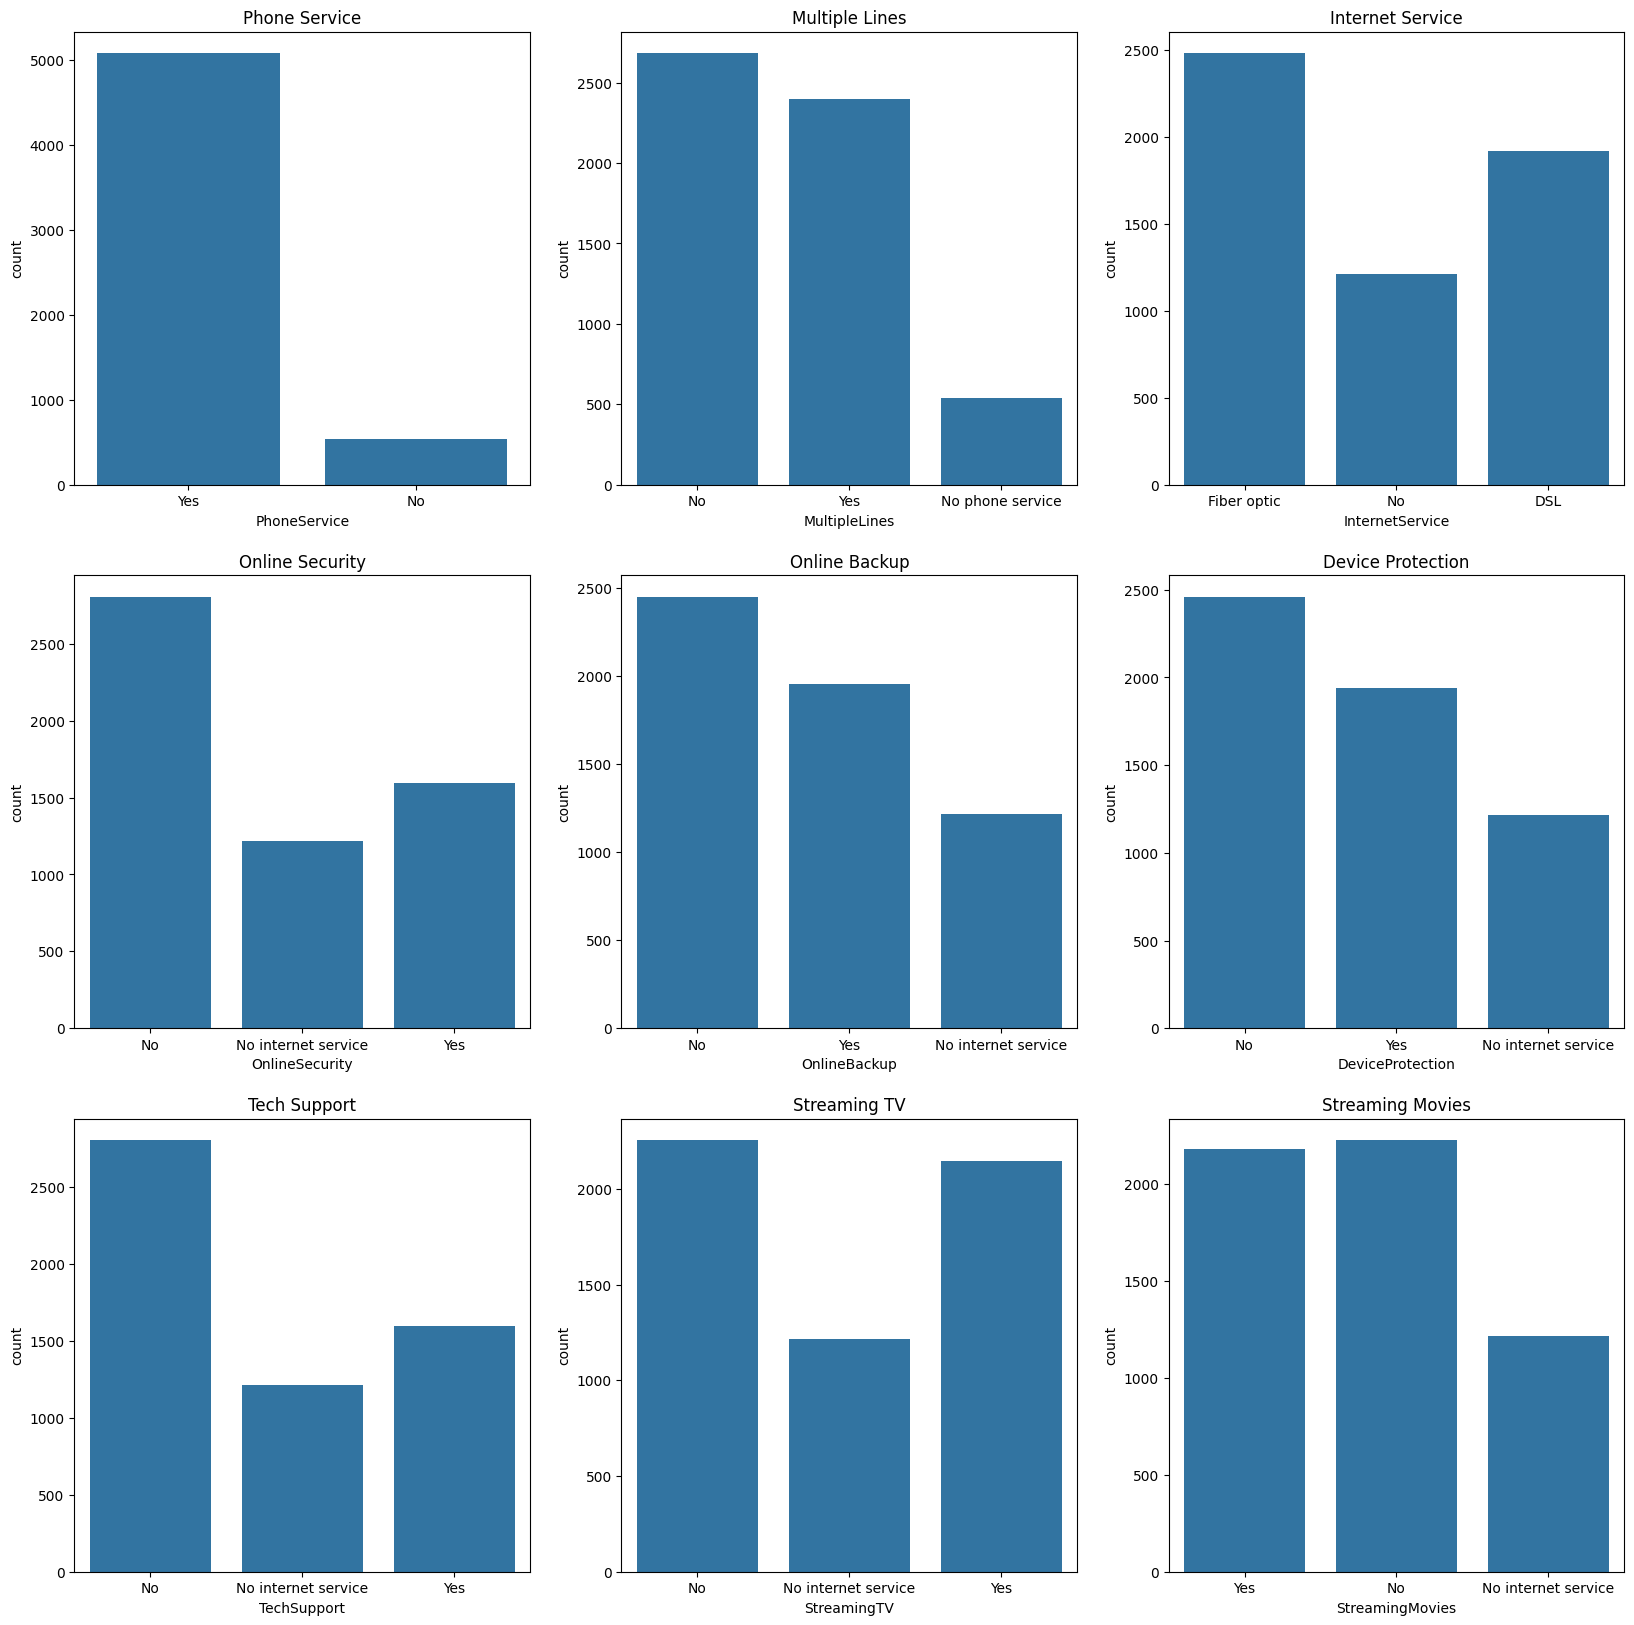

In [266]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
#phone service
sns.countplot(x = x_train['PhoneService'], ax=ax[0,0]).set_title('Phone Service')

#Multiple Lines
sns.countplot(x = x_train['MultipleLines'], ax=ax[0,1]).set_title('Multiple Lines')

#Internet Service
sns.countplot(x = x_train['InternetService'], ax=ax[0,2]).set_title('Internet Service')

#Online Security
sns.countplot(x = x_train['OnlineSecurity'], ax=ax[1,0]).set_title('Online Security')

#Online Backup
sns.countplot(x = x_train['OnlineBackup'], ax=ax[1,1]).set_title('Online Backup')

#Device Protection
sns.countplot(x = x_train['DeviceProtection'], ax=ax[1,2]).set_title('Device Protection')

#Tech Support
sns.countplot(x = x_train['TechSupport'], ax=ax[2,0]).set_title('Tech Support')

#Streaming TV
sns.countplot(x = x_train['StreamingTV'], ax=ax[2,1]).set_title('Streaming TV')

#Streaming Movies
sns.countplot(x = x_train['StreamingMovies'], ax=ax[2,2]).set_title('Streaming Movies')


Các biểu đồ trên cho thấy dịch vụ điện thoại và internet là hai dịch vụ phổ biến nhất của công ty viễn thông, với gần 6000 khách hàng dùng điện thoại và khoảng 5500 khách hàng dùng internet (trong đó 3000 khách hàng chọn cáp quang, số còn lại chọn DSL).

Ở các dịch vụ khác như Bảo mật trực tuyến, Sao lưu trực tuyến, Bảo vệ thiết bị, Hỗ trợ kỹ thuật và Dịch vụ phát trực tuyến, thì dịch vụ phát trực tuyến thu hút hơn 2500 khách hàng, cao nhất trong nhóm này. Trong khi đó, dịch vụ bảo mật và hỗ trợ kỹ thuật ít được quan tâm hơn, chỉ khoảng 2000 khách hàng đăng ký.

Tóm lại, ngoài điện thoại và internet, dịch vụ phát trực tuyến là dịch vụ được ưa chuộng nhất. Công ty nên tập trung nâng cao chất lượng dịch vụ này để đáp ứng nhu cầu khách hàng.

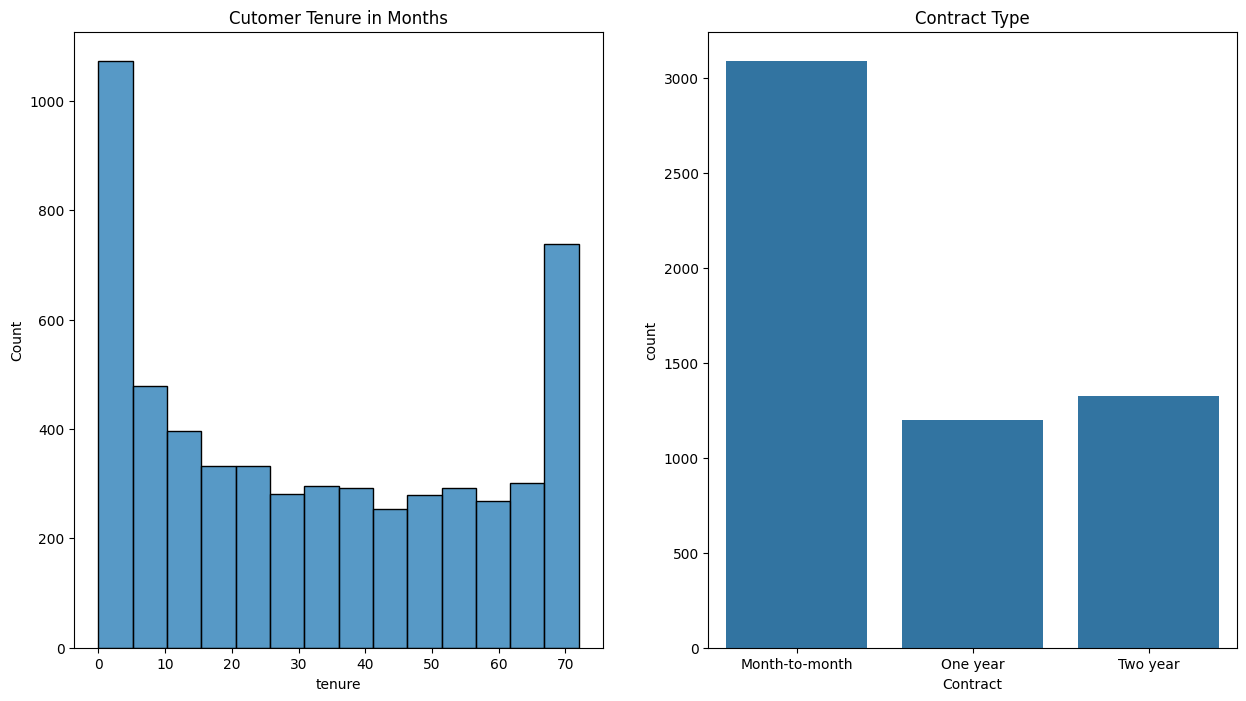

In [267]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8));
sns.histplot(x = x_train['tenure'], ax= ax[0]).set_title('Cutomer Tenure in Months');
sns.countplot(x = x_train['Contract'], ax= ax[1]).set_title('Contract Type');

Biểu đồ cho thấy đa số khách hàng chỉ gắn bó chưa đầy một tháng và chọn hợp đồng theo tháng. Một lượng lớn khách hàng gắn bó khoảng 70 tháng, thể hiện sự trung thành. Sau hợp đồng theo tháng, hợp đồng hai năm được khoảng 1700 khách hàng lựa chọn. Phần còn lại có thời gian gắn bó từ 1–5 năm.



Text(0.5, 1.0, 'Total Charges')

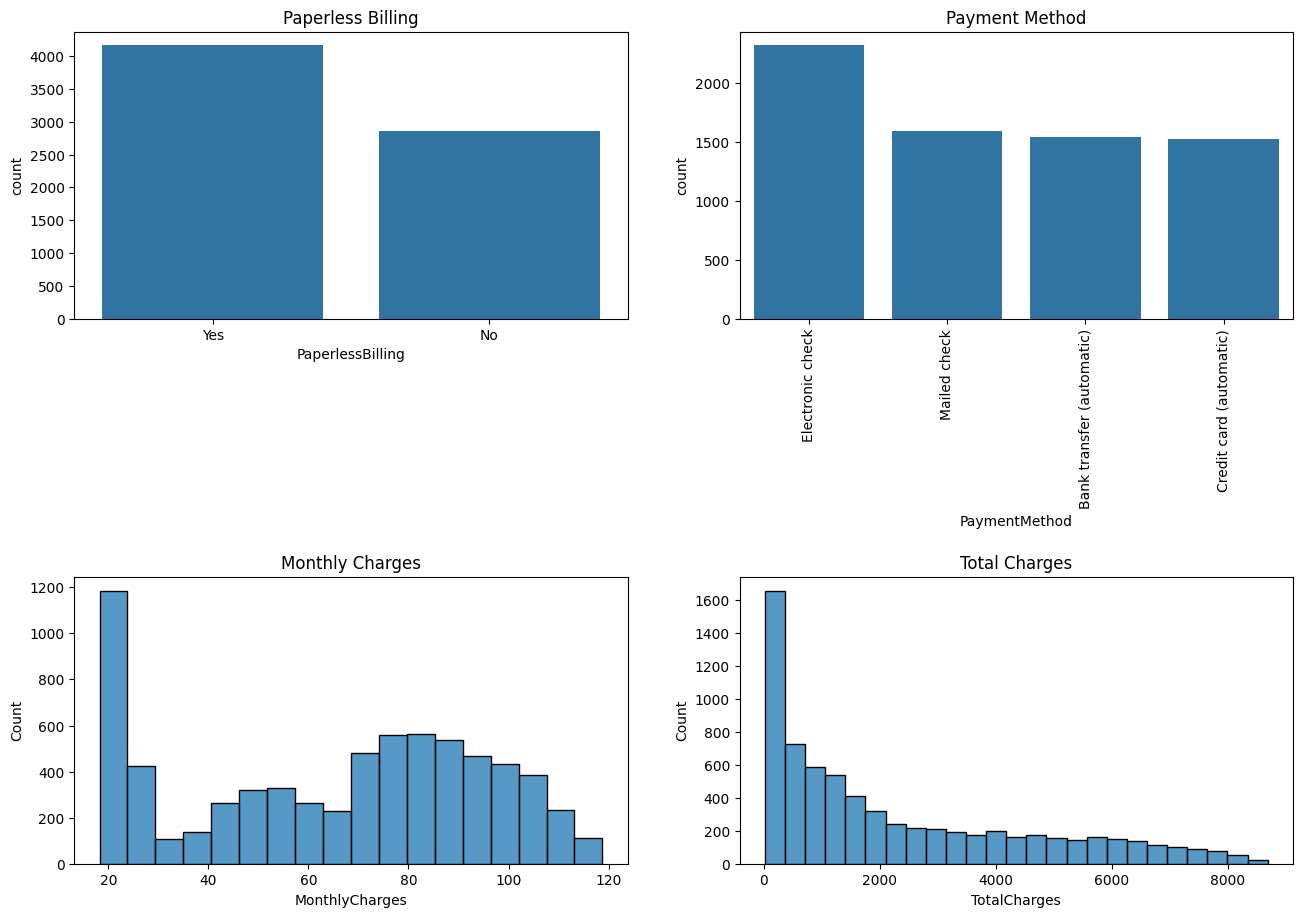

In [268]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
fig.tight_layout(pad=5.0)

#spacing between subplots
fig.subplots_adjust(hspace=0.9)
#papaerless billing
sns.countplot(x = dataset['PaperlessBilling'], ax=ax[0,0]).set_title('Paperless Billing')
#Payment Method
sns.countplot(x = dataset['PaymentMethod'], ax=ax[0,1]).set_title('Payment Method')
ax[0,1].xaxis.set_tick_params(rotation=90)
#Monthly Charges
sns.histplot(x = dataset['MonthlyCharges'], ax = ax[1,0]).set_title('Monthly Charges')
#Total Charges
sns.histplot(x = dataset['TotalCharges'], ax = ax[1,1]).set_title('Total Charges')

Phần lớn khách hàng (gần 4000) chọn hóa đơn điện tử và hơn một nửa trong số đó thanh toán qua séc điện tử. Ngoài ra, khoảng 4500 khách hàng dùng séc bưu điện, chuyển khoản ngân hàng hoặc thẻ tín dụng.

Hầu hết khách hàng trả khoảng 20 đô mỗi tháng và có tổng chi phí dưới 200 đô. Một số khách hàng trả phí hàng tháng cao hơn (70–100 đô) và tổng chi phí 200–800 đô. Đặc biệt, có khách hàng tổng chi phí vượt 4000 hoặc 8000 đô, thường do gắn bó lâu hoặc dùng nhiều dịch vụ.

Tóm lại, đa số khách hàng có mức chi phí thấp, công ty nên tập trung cung cấp dịch vụ giá rẻ để giữ chân họ.



Text(0.5, 1.0, 'churn')

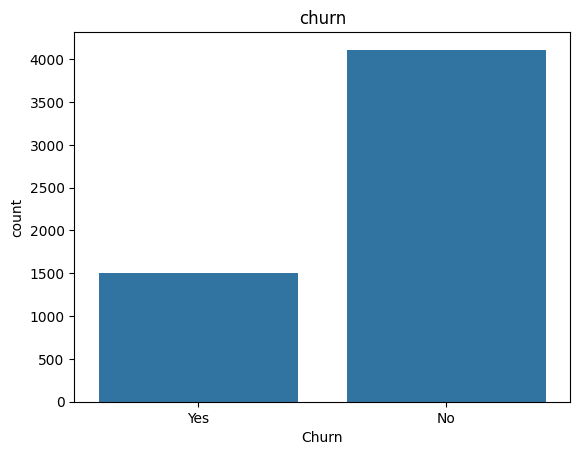

In [269]:
sns.countplot(x = y_train).set_title("churn")

# SO SÁNH TƯƠNG QUAN

Ở đây ta thấy được dữ số lượng dữ liệu khách hàng rời bỏ ít hơn nhiều so với khách hàng ở lại nên cần sử dụng các phương pháp M/L để giảm lệch label  

Text(0.5, 1.0, 'Dependents and Churn')

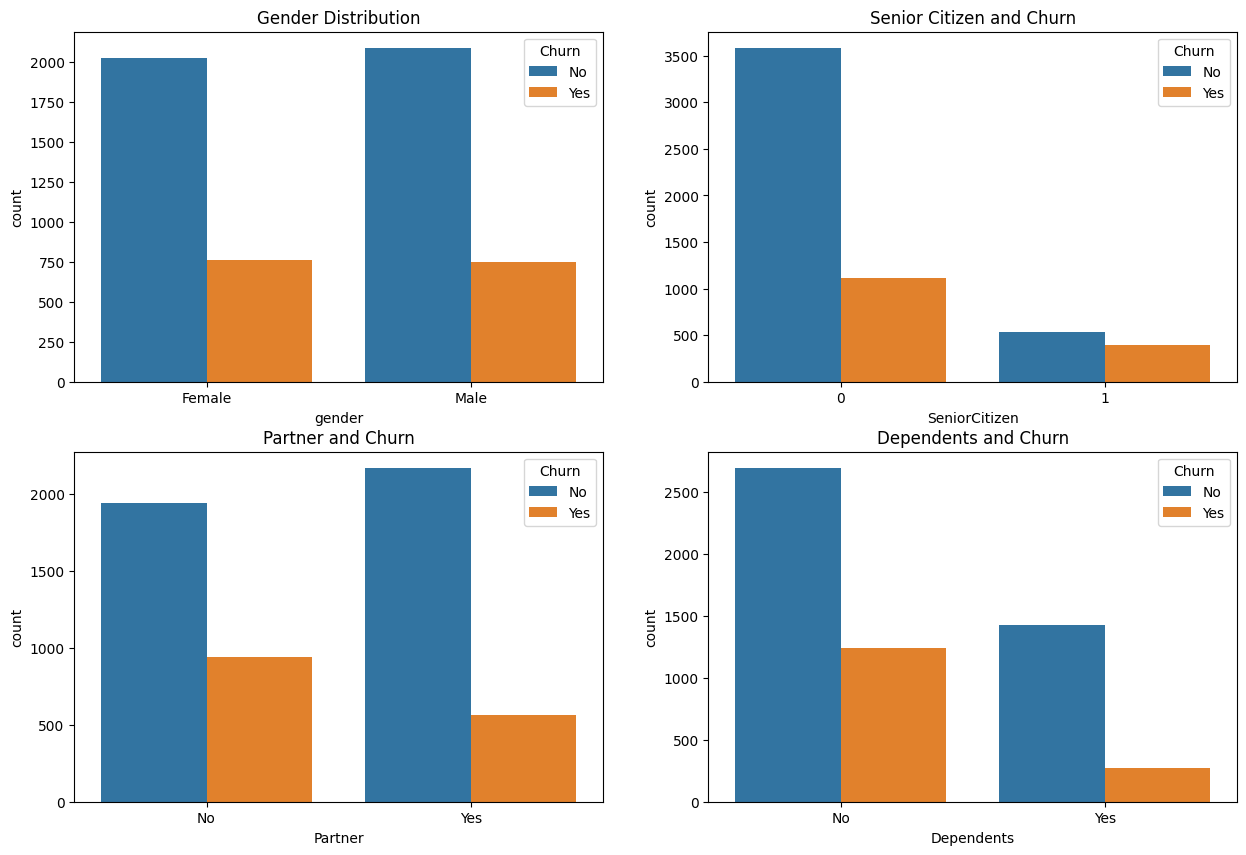

In [270]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

#Gender Distribution
sns.countplot(x = x_train['gender'], hue = y_train, ax=ax[0,0],hue_order=["No",'Yes']).set_title('Gender Distribution')

#Senior Citizen Distribution
sns.countplot(x = x_train['SeniorCitizen'], ax=ax[0,1], hue = y_train,hue_order=["No",'Yes']).set_title('Senior Citizen and Churn')

#Partner Distribution
sns.countplot( x = x_train['Partner'], ax=ax[1,0], hue = y_train,hue_order=["No",'Yes']).set_title('Partner and Churn')

#Dependents Distribution
sns.countplot(x = x_train['Dependents'], ax=ax[1,1], hue = y_train,hue_order=["No",'Yes']).set_title('Dependents and Churn')

Biểu đồ cho thấy giới tính không ảnh hưởng đến churn. Khách hàng cao tuổi ít rời bỏ hơn, có thể vì ngại thay đổi nhà mạng. Khách hàng độc thân hoặc không có người phụ thuộc có tỷ lệ rời bỏ cao hơn.

Tóm lại, khách hàng độc thân, không có người phụ thuộc dễ rời bỏ hơn, còn khách hàng cao tuổi trung thành hơn.

Text(0.5, 1.0, 'Streaming Movies')

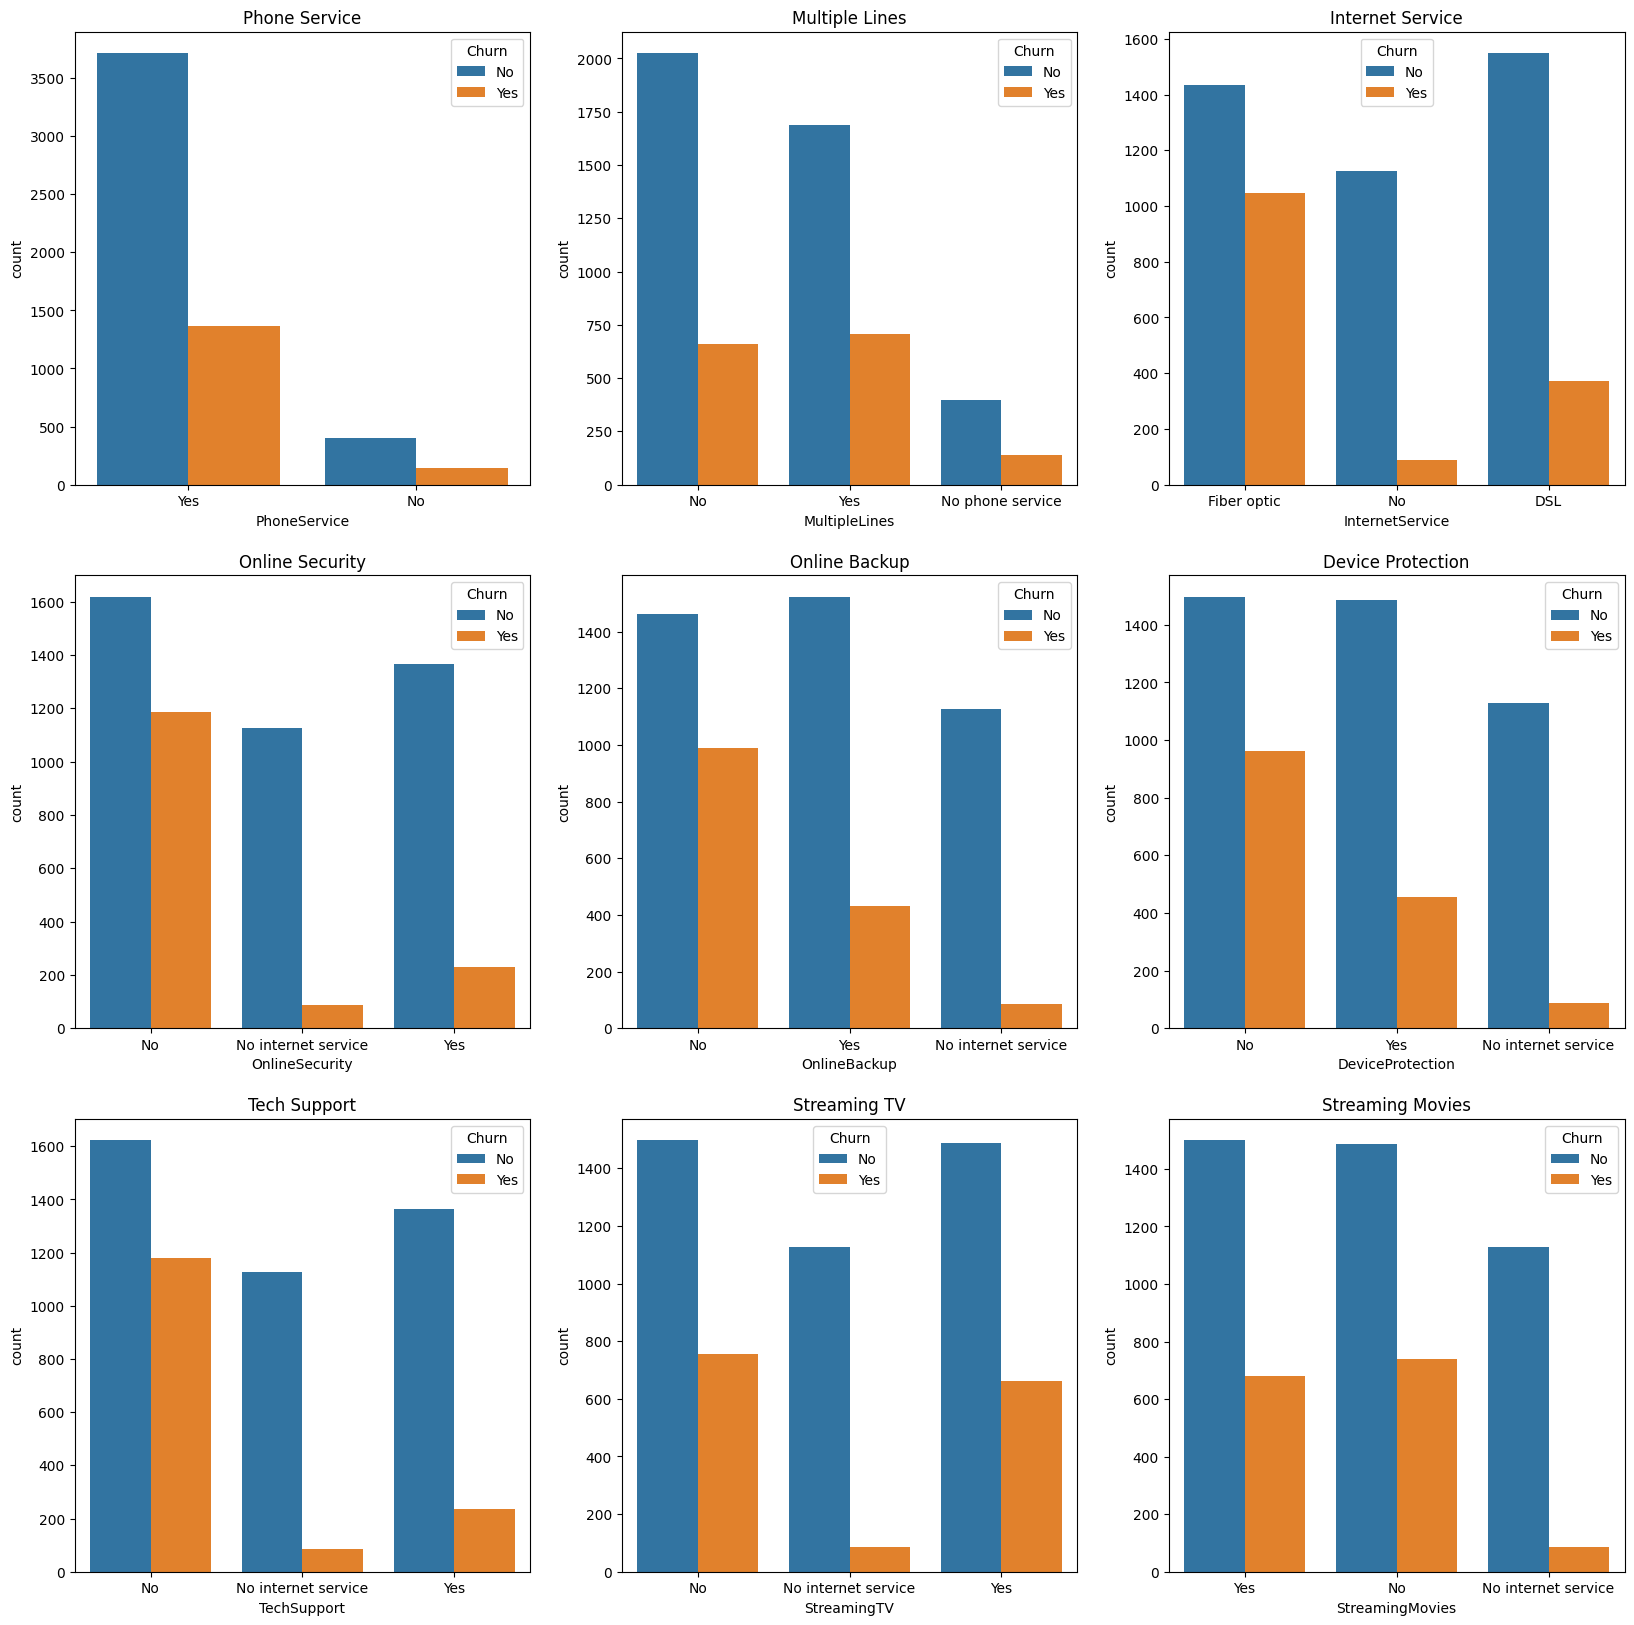

In [271]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
#phone service
sns.countplot(x = x_train['PhoneService'],hue= y_train,ax=ax[0,0],hue_order=["No",'Yes']).set_title('Phone Service')

#Multiple Lines
sns.countplot(x = x_train['MultipleLines'], hue= y_train, ax=ax[0,1],hue_order=["No",'Yes']).set_title('Multiple Lines')

#Internet Service
sns.countplot(x = x_train['InternetService'], hue= y_train, ax=ax[0,2],hue_order=["No",'Yes']).set_title('Internet Service')

#Online Security
sns.countplot(x = x_train['OnlineSecurity'], hue= y_train, ax=ax[1,0],hue_order=["No",'Yes']).set_title('Online Security')

#Online Backup
sns.countplot(x = x_train['OnlineBackup'], hue= y_train, ax=ax[1,1],hue_order=["No",'Yes']).set_title('Online Backup')

#Device Protection
sns.countplot(x = x_train['DeviceProtection'], hue= y_train, ax=ax[1,2],hue_order=["No",'Yes']).set_title('Device Protection')

#Tech Support
sns.countplot(x = x_train['TechSupport'], hue= y_train, ax=ax[2,0],hue_order=["No",'Yes']).set_title('Tech Support')

#Streaming TV
sns.countplot(x = x_train['StreamingTV'], hue= y_train, ax=ax[2,1],hue_order=["No",'Yes']).set_title('Streaming TV')

#Streaming Movies
sns.countplot(x = x_train['StreamingMovies'], hue= y_train, ax=ax[2,2],hue_order=["No",'Yes']).set_title('Streaming Movies')


Biểu đồ cho thấy dịch vụ điện thoại và internet không liên quan nhiều đến churn. Tuy nhiên, khách hàng dùng nhiều đường dây, không dùng Online Backup hoặc Device Protection có tỷ lệ rời bỏ cao hơn. Ngược lại, khách hàng có dùng dịch vụ phát trực tuyến ít rời bỏ hơn.

Tóm lại, churn liên quan đến: multiple lines, Online Backup, Device Protection và Streaming Services.



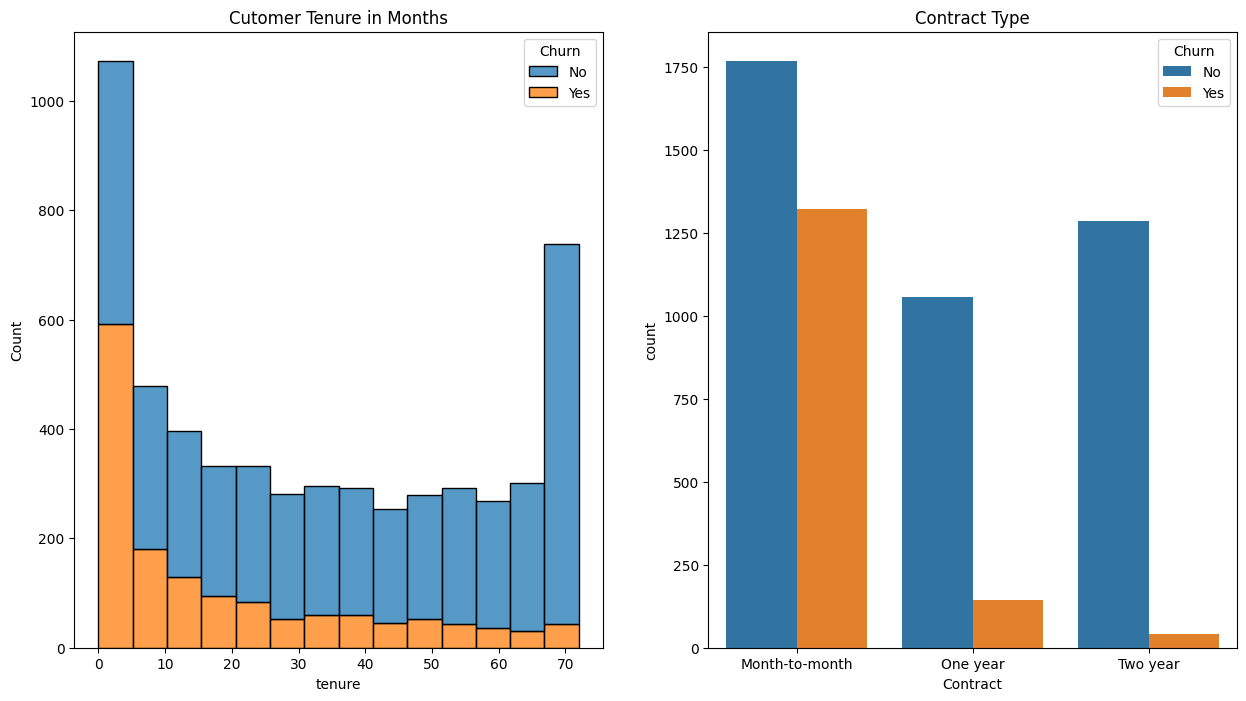

In [272]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8));
sns.histplot(x = x_train['tenure'],hue= y_train,ax= ax[0],  multiple = 'stack',hue_order=["No",'Yes']).set_title('Cutomer Tenure in Months');
sns.countplot(x = x_train['Contract'], hue= y_train,ax= ax[1],hue_order=["No",'Yes']).set_title('Contract Type');

Khách hàng gắn bó dưới 5 tháng có tỷ lệ rời bỏ cao; churn giảm dần khi tenure tăng. Khách dùng hợp đồng theo tháng rời bỏ nhiều hơn so với hợp đồng 1–2 năm, chứng tỏ hợp đồng dài hạn giúp giữ chân khách hàng.



Text(0.5, 1.0, 'Total Charges')

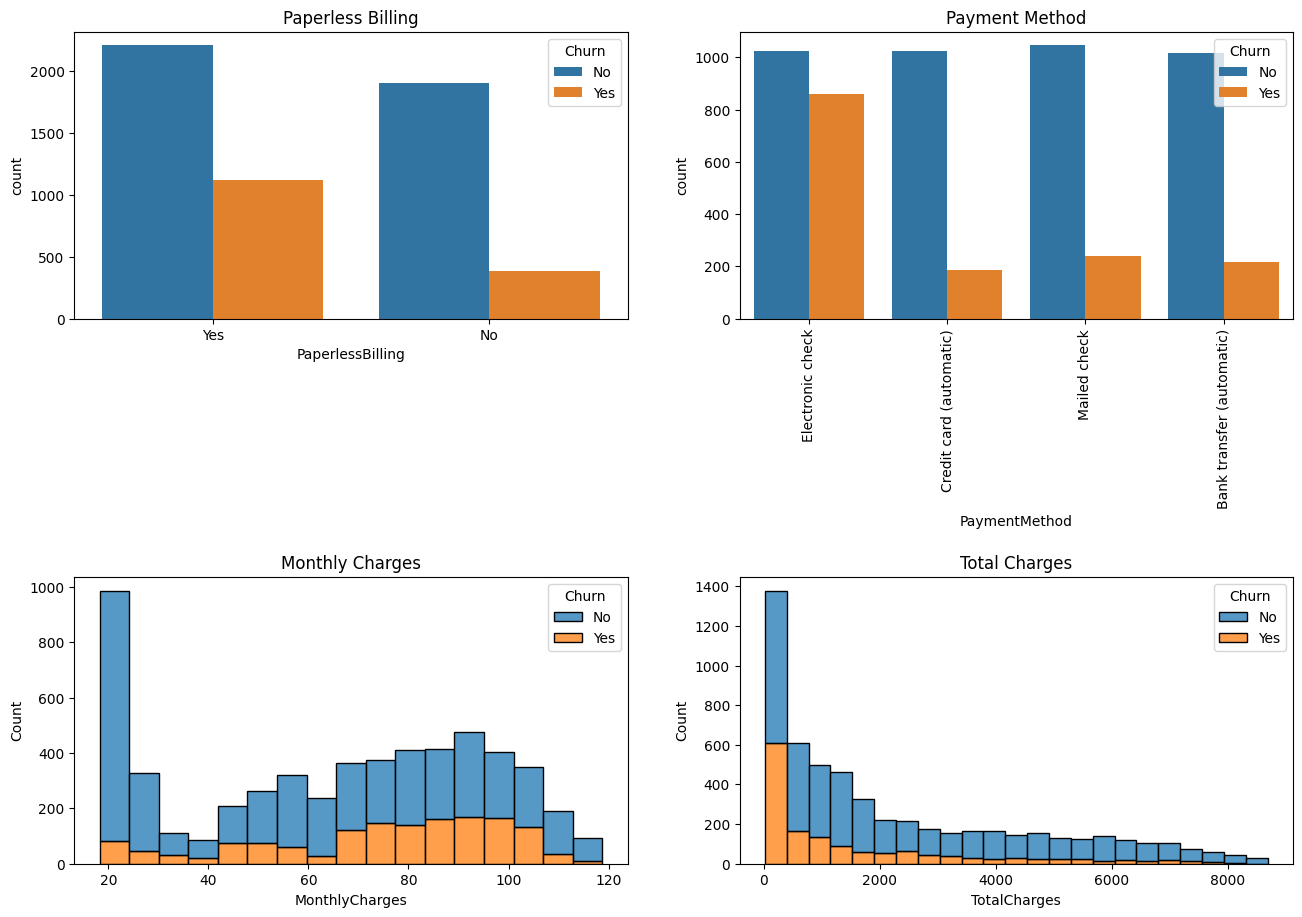

In [273]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
fig.tight_layout(pad=5.0)

#spacing between subplots
fig.subplots_adjust(hspace=0.9)
#papaerless billing
sns.countplot(x = x_train['PaperlessBilling'], hue= y_train,ax=ax[0,0],hue_order=['No','Yes']).set_title('Paperless Billing')
#Payment Method
sns.countplot(x = x_train['PaymentMethod'], hue= y_train, ax=ax[0,1],hue_order=['No','Yes']).set_title('Payment Method')
ax[0,1].xaxis.set_tick_params(rotation=90)
#Monthly Charges
sns.histplot(x = x_train['MonthlyCharges'], hue= y_train,multiple= 'stack', ax = ax[1,0],hue_order=['No','Yes']).set_title('Monthly Charges')
#Total Charges
sns.histplot(x = x_train['TotalCharges'], hue= y_train, multiple= 'stack', ax = ax[1,1],hue_order=['No','Yes']).set_title('Total Charges')


# delete outlier

Phương thức thanh toán không ảnh hưởng nhiều đến churn. Khách có phí hàng tháng cao dễ rời bỏ, nhưng khách có tổng chi phí cao thường trung thành hơn, có thể vì dùng lâu hoặc dùng nhiều dịch vụ. Công ty nên giảm phí hàng tháng để giữ chân khách hàng.

In [274]:
cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

Q1 = x_train[cols].quantile(0.25)
Q3 = x_train[cols].quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)
#Removing the outliers
# Check if removing outliers would result in an empty DataFrame
outlier_mask = ((x_train[cols] < (Q1 - 1.5 * IQR)) |(x_train[cols] > (Q3 + 1.5 * IQR))).any(axis=1)
if x_train[~outlier_mask].empty:
    print("Warning: Removing outliers would result in an empty DataFrame. Skipping outlier removal.")
else:
    x_train = x_train[~outlier_mask]

tenure              9.00
MonthlyCharges     35.50
TotalCharges      407.95
Name: 0.25, dtype: float64
tenure              55.0
MonthlyCharges      90.1
TotalCharges      3782.8
Name: 0.75, dtype: float64
tenure              46.00
MonthlyCharges      54.60
TotalCharges      3374.85
dtype: float64


# Oversampling data

In [275]:
overs = RandomOverSampler()
x_train,y_train = overs.fit_resample(x_train,y_train)


In [276]:
label =LabelEncoder()
y_train = label.fit_transform(y_train)
y_test = label.transform(y_test)

# ma hoa

In [277]:
transfo = ColumnTransformer( transformers=[
    ('phanloai',OneHotEncoder(),['gender','SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod']),
    ('number',StandardScaler(),['tenure','MonthlyCharges','TotalCharges'])
])


#desison tree

In [278]:
tree = Pipeline(steps= [
    ('transfo', transfo),
    ('model', DecisionTreeClassifier(random_state= 42))
])


param_tree = {
    'model__max_depth': [2,4,6,8,10],
    'model__min_samples_leaf': [2,4,6,8,10],
    'model__min_samples_split': [2,4,6,8,10],
    'model__criterion': ['gini', 'entropy']
}

grid_search_tree = GridSearchCV(estimator = tree, param_grid = param_tree, cv = 3, n_jobs = -1, verbose = 2, scoring='recall')

#Fitting the data
grid_search_tree.fit(x_train, y_train)

#Best parameters
print(grid_search_tree.best_params_)


Fitting 3 folds for each of 250 candidates, totalling 750 fits
{'model__criterion': 'gini', 'model__max_depth': 10, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2}


In [279]:
tree1 = Pipeline(steps= [
    ('transfo', transfo),
    ('model', DecisionTreeClassifier(max_depth= 10, criterion= 'gini', min_samples_leaf=2,min_samples_split=2))
])
tree1.fit(x_train,y_train)


Pipeline(steps=[('transfo',
                 ColumnTransformer(transformers=[('phanloai', OneHotEncoder(),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('number', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('model',
                 DecisionTreeClassifier(max_depth=10, min_samples_leaf=2))])

In [280]:
result_tree = tree1.predict(x_test)
print(classification_report(y_test,result_tree))

              precision    recall  f1-score   support

           0       0.87      0.72      0.78      1053
           1       0.44      0.68      0.54       352

    accuracy                           0.71      1405
   macro avg       0.66      0.70      0.66      1405
weighted avg       0.76      0.71      0.72      1405



                precision    recall  f1-score   support
           0       0.88      0.71      0.78      1053
           1       0.45      0.71      0.55       352


#Randomforest

In [281]:
random = Pipeline(steps= [
    ('transfo', transfo),
    ('model', RandomForestClassifier(random_state= 42))
 ])
param_random = {
    'model__n_estimators': [200,300,100,500],
    'model__max_depth': [2,4,6]
}

grid_search_random = GridSearchCV(estimator = random, param_grid = param_random, scoring='recall')

grid_search_random.fit(x_train, y_train)

print(grid_search_random.best_params_)

{'model__max_depth': 2, 'model__n_estimators': 100}


In [282]:
random1 = Pipeline(steps= [
    ('transfo', transfo),
    ('model', RandomForestClassifier(max_depth=2,n_estimators= 100, random_state= 42))
 ])
random1.fit(x_train,y_train)

Pipeline(steps=[('transfo',
                 ColumnTransformer(transformers=[('phanloai', OneHotEncoder(),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('number', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('model',
                 RandomForestClassifier(max_depth=2, random_state=42))])

In [283]:
result_random = random1.predict(x_test)

print(classification_report(y_test, result_random))

              precision    recall  f1-score   support

           0       0.93      0.66      0.77      1053
           1       0.45      0.85      0.59       352

    accuracy                           0.70      1405
   macro avg       0.69      0.75      0.68      1405
weighted avg       0.81      0.70      0.72      1405



              precision    recall  f1-score   support

           0       0.93      0.65      0.77      1053
           1       0.45      0.86      0.59       352


# support vector machine

In [284]:
svc = Pipeline(steps = [
    ('tranfo', transfo),
    ('model', SVC())
])
param_svc= {
    'model__cache_size':[200,300,400,500],
    'model__decision_function_shape': ['ovo','ovr']
}
grid_search_svc = GridSearchCV(estimator= svc,param_grid= param_svc,scoring='recall')

grid_search_svc.fit(x_train,y_train)
print(grid_search_svc.best_params_)

{'model__cache_size': 200, 'model__decision_function_shape': 'ovo'}


In [285]:
svc1 = Pipeline(steps = [
    ('tranfo', transfo),
    ('model', SVC(cache_size= 200,decision_function_shape= 'ovo'))
])
svc1.fit(x_train,y_train)

Pipeline(steps=[('tranfo',
                 ColumnTransformer(transformers=[('phanloai', OneHotEncoder(),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('number', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('model', SVC(decision_function_shape='ovo'))])

In [286]:
result_svc = svc1.predict(x_test)
print(classification_report(y_test,result_svc))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1053
           1       0.49      0.78      0.60       352

    accuracy                           0.74      1405
   macro avg       0.70      0.75      0.71      1405
weighted avg       0.80      0.74      0.76      1405



              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1053
           1       0.49      0.77      0.60       352

# Kết quả: dựa trên nhu cầu phát hiện được nhiều cá nhân muốn rời bỏ nhất có thể để đưa ra các biện pháp thu hút và giảm tình trạng khách hàng từ bỏ doanh nghiệp, model hiệu quả nhất là randomforest classcification

# biểu đồ giá trị dự đoán và giá trị kết quả của tập test


/tmp/ipython-input-287-756180911.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist=False, color="g", label="Actual Value").set_title('randomforest Tree');
/tmp/ipython-input-287-756180911.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result_random, hist=Fal

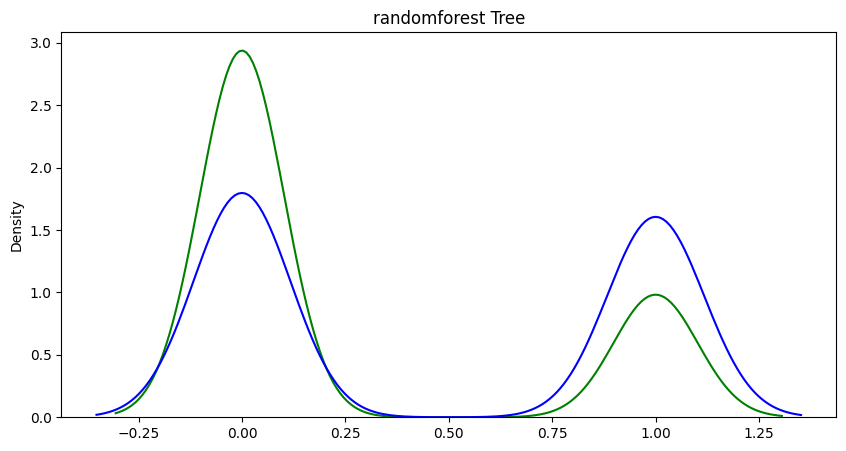

In [287]:
fig, ax = plt.subplots(figsize=(10, 5));

#Decision Tree
sns.distplot(y_test, hist=False, color="g", label="Actual Value").set_title('randomforest Tree');
sns.distplot(result_random, hist=False, color="b", label="Fitted Values");


# Biểu đồ các đặt trưng có tác động mạnh tới việc khách hàng rời bỏ dịch vụ của doanh nghiệp

Text(0.5, 1.0, 'Random Forest Classifier Feature Importance')

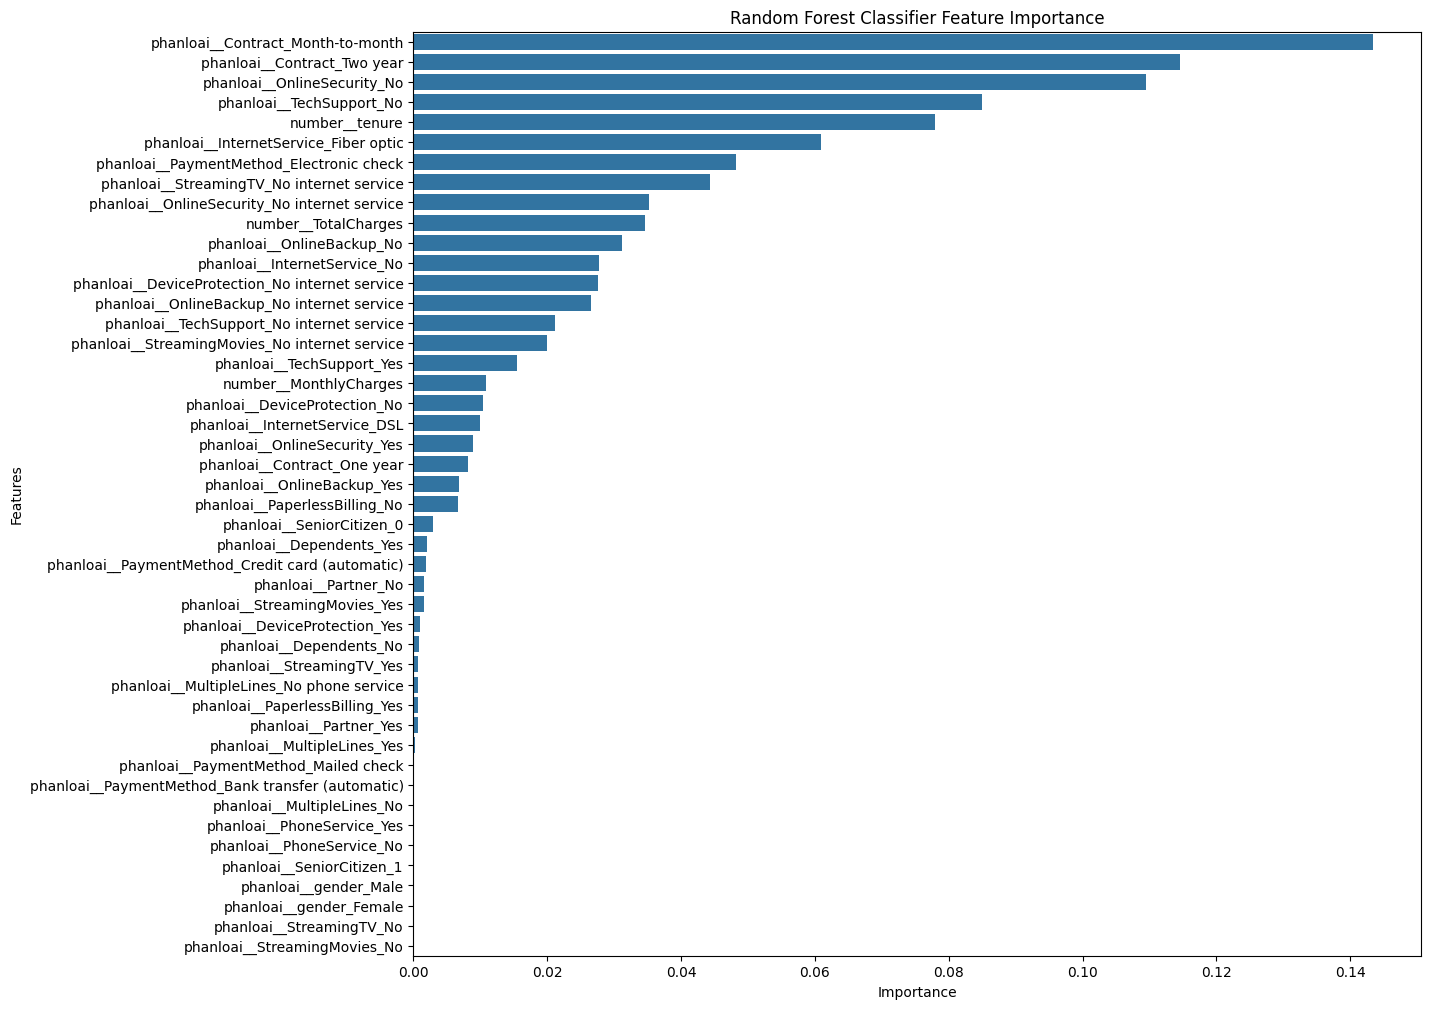

In [288]:
impor=random1.named_steps['transfo']
feature_names = impor.get_feature_names_out()
feature_names

model = random1.named_steps['model']

fig, ax = plt.subplots(figsize=(13, 12))

feature_df = pd.DataFrame({'Features': feature_names, 'Importance':model.feature_importances_})
feature_df.sort_values('Importance', ascending=False, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_df).set_title('Random Forest Classifier Feature Importance')


                                     🌼 Lời cảm ơn 🌼
                      💖 Cảm ơn anh/chị đã ghé thăm project nhỏ xinh này!
Hy vọng bạn thấy thú vị 🌱✨ và đừng ngại để lại góp ý để em làm tốt hơn nhé! 🌟😊



